In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mpltick

%load_ext autoreload
%autoreload 2
# importing our manual plotting utils
from utils import *

In [2]:
def get_avalanche_lines(ax, k, Ls, nfiles, colors, path, exp_label_pos, bins, nbins, xticks, yticks, index_aval=0, legend_pos=None, fitsize=128, min_range=10, max_percent=0.96, linefit=1.0, expname="\\tau"):
    #Get all data from files
    for j,L in enumerate(Ls):
        sizes = np.empty(0)
        times = np.empty(0) 
        for m in range(nfiles[L]):
            avalpath = path + "aval_{0}_{1}_part{2}".format(k, L, m)
            data = pd.read_csv(avalpath, sep=" ").values
            avalvalues = np.append(sizes, data[:,index_aval])
            del data
        #alpha = plot_av(ax, sizes, minlogbin, maxlogbin, nlogbins, cK[L], label="$L=${0}".format(L), plot_fit=L==128, xmin=min_range, xmax_percentile=max_percent, fit_zeroValue=linepos[i])
        alpha = plot_av(ax, avalvalues, bins[0], bins[1], nbins, colors[L], label="$L=${0}".format(L), plot_fit=L==fitsize, xmin=min_range, xmax_percentile=max_percent, fit_zeroValue=linefit)
        if alpha != None:
            ax.text(exp_label_pos[0], exp_label_pos[1], f"${expname} = {alpha:.2f}$", color='k', transform=ax.transAxes)

    ax.set_xlim(bins[0], bins[1])

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.tick_params(axis='x', which='major', pad=0)
    ax.tick_params(axis='y', which='major', pad=0)

    #ax.set_xlim(minlogbin, maxlogbin)

    #Free some RAM
    del avalvalues, times

    if legend_pos != None:
        ax.legend(loc=legend_pos, frameon = False, handletextpad=0.2, handlelength = 0.7, labelspacing=0.0)

New versions with only two columns

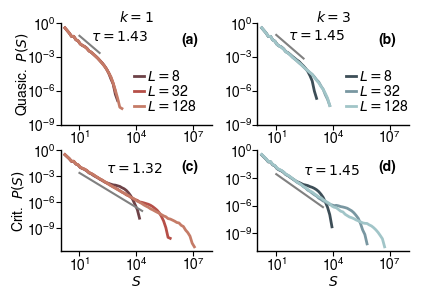

In [11]:
Ls = [8,32,128]
ks = [1, 3]
nfiles = {1: {8:10, 16:10, 32:10, 64:10, 128:100}, 2:{8:10, 16:10, 32:10, 64:10, 128:100}, 3:{8:10, 16:10, 32:10, 64:10, 128:100}}

nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=one_col_fig(fig_width_1col/1.4))
despine(axes)

#For calling the figure a,b,c,d...
alphabet = ["({0})".format(x) for x in ["a", "b", "c", "d"]]


coltitle = [r'$k={0}$'.format(k) for k in ks]
rowtitle = ["Quasic.  ", "Crit.  "]

titlepad = 1
for ax, col in zip(axes[0], coltitle):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, titlepad), xycoords='axes fraction', textcoords='offset points', ha='center', va='baseline')

for ax in axes[1]:
    ax.set_xlabel("$S$", labelpad=1)

titlepad=[3,2]
labelpad=[-2,1]
for j,ax, row in zip(range(2), axes[:,0], rowtitle):
    #ax.annotate(row, xy=(0, 0.5), rotation=90, xytext=(-titlepad[j], 0), xycoords=ax.yaxis.label, textcoords='offset points', size='large', ha='right', va='center')
    ax.set_ylabel(row + "$P(S)$", labelpad=labelpad[j])
    

paths = [f"../results/aval-paper-def/{sub}critical-k/" for sub in ["sub", ""]]

min_range = 10
max_percent = 0.96

logbins = [1, 10**8]
nlogbins = 70

xticks = [10**j for j in range(1,10,3)]
yticks = [10**j for j in range(-9, 1, 3)]

#This was for the critical one
#Where to put axes ticks
#yticks = [10**j for j in range(-12, 1, 4)]

xtextpos = [[0.2, 0.2], [0.3, 0.3]]
ytextpos = [[0.83, 0.84], [0.78, 0.76]]

legendxpos = [0.45,0.55]
linepos = [[2.0,2.5], [0.05,0.075]]

for i,k in enumerate(ks):
    for j in range(nrows):
        path = paths[j]
        ax = axes[j,i]

        labelpos = [xtextpos[j][i], ytextpos[j][i]]
        linesep = linepos[j][i]

        if j==0:
            legendpos = (legendxpos[i], 0.05)
        else:
            legendpos = None

        ax.patch.set_alpha(0.0)
        get_avalanche_lines(ax, k, Ls, nfiles[k], cK[k], path, labelpos, logbins, nlogbins, xticks, yticks, legend_pos=legendpos, linefit=linesep)

label_axes(axes, (0.8,0.8))


fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.25)
#fig.savefig("fig3-aval-k.pdf".format(k,tau), bbox_inches="tight")
plt.show()